# Python AWIPS Data Access Framework

AWIPS (formerly AWIPS II or AWIPS2) is a weather forecasting display and analysis package developed by the National Weather Service and Raytheon and released as open source software by Unidata. 

AWIPS takes a unified approach to data ingest, starting with an LDM client requesting data from Unidata's IDD. Data files recevied by the LDM are decodedn by EDEX (stored as HDF5 and PostgreSQL/PostGIS metadata). In addition to the CAVE Java client, Unidata supports the [python-awips package](http://python-awips.readthedocs.io), a Data Access Framework (DAF) for requesting data from an AWIPS EDEX server. 

### Install python-awips

    pip install python-awips

Requirements: **Python >=2.7**, **Shapely >=1.4**

### From Github

    git clone https://github.com/Unidata/python-awips.git
    cd python-awips
    python setup.py install

### Install on an AWIPS system (CAVE, EDEX)

#### Using easy_install

* For Unidata AWIPS release **16.2.2+**:

        /awips2/python/bin/easy_install pip
        /awips2/python/bin/pip install python-awips
  
* For releases before and up to **16.1.5** you may need to run

        yum install awips2-python-setuptools

    

# DAF Design

The Data Access Framework is designed to provide a consistent interface for requesting and using geospatial data (for use within CAVE and EDEX). The framework supports two types of data requests: **grids** (grib, satellite, radar), and **geometries** (maps, obs, warnings, etc.)

### Supported Data Types

In [1]:
from awips.dataaccess import DataAccessLayer
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
dataTypes = DataAccessLayer.getSupportedDatatypes()
list(dataTypes)

[b'acars',
 b'airep',
 b'binlightning',
 b'bufrmosavn',
 b'bufrmoseta',
 b'bufrmosgfs',
 b'bufrmoshpc',
 b'bufrmoslamp',
 b'bufrmosmrf',
 b'bufrmosngm',
 b'bufrua',
 b'climate',
 b'common_obs_spatial',
 b'ffmp',
 b'gfe',
 b'grid',
 b'hydro',
 b'ldadmesonet',
 b'maps',
 b'modelsounding',
 b'obs',
 b'pirep',
 b'practicewarning',
 b'profiler',
 b'radar',
 b'radar_spatial',
 b'satellite',
 b'sfcobs',
 b'warning']

# Grid Inventory

Calling **newDataRequest()** and **setDatatype("grid")** we can print out the list of available grids:

In [2]:
request = DataAccessLayer.newDataRequest()
request.setDatatype("grid")

available_grids = DataAccessLayer.getAvailableLocationNames(request)
available_grids.sort()
list(available_grids)

[b'CMC',
 b'DGEX',
 b'ESTOFS',
 b'ETSS',
 b'FFG-ALR',
 b'FFG-FWR',
 b'FFG-KRF',
 b'FFG-MSR',
 b'FFG-ORN',
 b'FFG-PTR',
 b'FFG-RHA',
 b'FFG-RSA',
 b'FFG-STR',
 b'FFG-TAR',
 b'FFG-TIR',
 b'FFG-TUA',
 b'FNMOC-FAROP',
 b'GFS',
 b'GFS20',
 b'GFSGuide',
 b'GFSLAMP5',
 b'GLERL',
 b'GribModel:58:0:135',
 b'GribModel:58:0:18',
 b'GribModel:58:0:78',
 b'GribModel:9:151:172',
 b'HFR-EAST_6KM',
 b'HFR-EAST_PR_6KM',
 b'HFR-US_EAST_DELAWARE_1KM',
 b'HFR-US_EAST_FLORIDA_2KM',
 b'HFR-US_EAST_NORTH_2KM',
 b'HFR-US_EAST_SOUTH_2KM',
 b'HFR-US_EAST_VIRGINIA_1KM',
 b'HFR-US_HAWAII_1KM',
 b'HFR-US_HAWAII_2KM',
 b'HFR-US_HAWAII_6KM',
 b'HFR-US_WEST_500M',
 b'HFR-US_WEST_CENCAL_2KM',
 b'HFR-US_WEST_LOSANGELES_1KM',
 b'HFR-US_WEST_LOSOSOS_1KM',
 b'HFR-US_WEST_NORTH_2KM',
 b'HFR-US_WEST_SANFRAN_1KM',
 b'HFR-US_WEST_SOCAL_2KM',
 b'HFR-US_WEST_WASHINGTON_1KM',
 b'HFR-WEST_6KM',
 b'HPCGuide',
 b'HPCqpf',
 b'HPCqpfNDFD',
 b'HRRR',
 b'HRRRX',
 b'LAMP2p5',
 b'MOSGuide',
 b'MOSGuideExtended',
 b'MPE-Local-ALR',
 b'MPE

### Set grid name with `setLocationNames()`

In [3]:
request.setLocationNames("RAP40")

# List Available Parameters for a Grid

This example requests the U and V wind components for the RAP 13km CONUS and plots the wind speed (total vector) as a gridded contour (color-filled isotachs, essentially), calling **getAvailableParameters()**:

In [4]:
availableParms = DataAccessLayer.getAvailableParameters(request)
availableParms.sort()
list(availableParms)

[b'AV',
 b'BLI',
 b'CAPE',
 b'CFRZR',
 b'CICEP',
 b'CIn',
 b'CP',
 b'CP10hr',
 b'CP11hr',
 b'CP12hr',
 b'CP13hr',
 b'CP14hr',
 b'CP15hr',
 b'CP16hr',
 b'CP17hr',
 b'CP18hr',
 b'CP1hr',
 b'CP2hr',
 b'CP3hr',
 b'CP4hr',
 b'CP5hr',
 b'CP6hr',
 b'CP9hr',
 b'CRAIN',
 b'CSNOW',
 b'DpD',
 b'DpT',
 b'EPT',
 b'GH',
 b'HCDC',
 b'HINDEX',
 b'HPBL',
 b'Heli',
 b'LCDC',
 b'LTNG',
 b'LgSP',
 b'LgSP10hr',
 b'LgSP11hr',
 b'LgSP12hr',
 b'LgSP13hr',
 b'LgSP14hr',
 b'LgSP15hr',
 b'LgSP16hr',
 b'LgSP17hr',
 b'LgSP18hr',
 b'LgSP1hr',
 b'LgSP2hr',
 b'LgSP3hr',
 b'LgSP4hr',
 b'LgSP5hr',
 b'LgSP6hr',
 b'LgSP9hr',
 b'MCDC',
 b'MMSP',
 b'MSTAV',
 b'P',
 b'PLPL',
 b'PR',
 b'PVV',
 b'PW',
 b'PoT',
 b'REFD',
 b'RH',
 b'SH',
 b'SLI',
 b'SnD',
 b'T',
 b'TOTSN',
 b'TOTSN10hr',
 b'TOTSN11hr',
 b'TOTSN12hr',
 b'TOTSN13hr',
 b'TOTSN14hr',
 b'TOTSN15hr',
 b'TOTSN16hr',
 b'TOTSN17hr',
 b'TOTSN18hr',
 b'TOTSN1hr',
 b'TOTSN2hr',
 b'TOTSN3hr',
 b'TOTSN4hr',
 b'TOTSN5hr',
 b'TOTSN6hr',
 b'TOTSN9hr',
 b'TP',
 b'TP10hr',
 b'TP1

### setParameters()

set the request parameter

In [5]:
request.setParameters("T")

## List Available Levels for Parameter

Using **DataAccessLayer.getAvailableLevels()**

In [6]:
availableLevels = DataAccessLayer.getAvailableLevels(request)
for level in availableLevels: print(level)

875.0b'MB'
575.0b'MB'
650.0b'MB'
675.0b'MB'
0.0b'TROP'
700.0b'MB'
250.0b'MB'
350.0b'MB'
150.0b'MB'
550.0b'MB'
375.0b'MB'
0.0b'SFC'
150.0_180.0b'BL'
120.0_150.0b'BL'
1000.0b'MB'
725.0b'MB'
125.0b'MB'
850.0b'MB'
0.0_30.0b'BL'
325.0b'MB'
225.0b'MB'
400.0b'MB'
450.0b'MB'
600.0b'MB'
2.0b'FHAG'
975.0b'MB'
950.0b'MB'
30.0_60.0b'BL'
475.0b'MB'
825.0b'MB'
425.0b'MB'
525.0b'MB'
200.0b'MB'
775.0b'MB'
60.0_90.0b'BL'
300.0b'MB'
175.0b'MB'
275.0b'MB'
100.0b'MB'
90.0_120.0b'BL'
800.0b'MB'
80.0b'FHAG'
500.0b'MB'
625.0b'MB'
925.0b'MB'
750.0b'MB'
900.0b'MB'


* **0.0SFC** is the Surface level
* **FHAG** stands for Fixed Height Above Ground (in meters)
* **NTAT** stands for Nominal Top of the ATmosphere
* **BL** stands for Boundary Layer, where **0.0_30.0BL** reads as *0-30 mb above ground level*  
* **TROP** is the Tropopause level

### request.setLevels()

For this example we will use Surface Temperatur

In [7]:
request.setLevels("0.0SFC")

### DataAccessLayer.getAvailableTimes()

* **getAvailableTimes(request, True)** will return an object of *run times* - formatted as `YYYY-MM-DD HH:MM:SS`
* **getAvailableTimes(request)** will return an object of all times - formatted as `YYYY-MM-DD HH:MM:SS (F:ff)`

In [8]:
cycles = DataAccessLayer.getAvailableTimes(request, True)
times = DataAccessLayer.getAvailableTimes(request)

# Request a Grid


In [9]:
response = DataAccessLayer.getGridData(request, [times[-1]])

In [10]:
for grid in response:
    data = grid.getRawData()
    lons, lats = grid.getLatLonCoords()
    print(str(grid.getDataTime()))
    print(data.shape)

2016-10-19 15:00:00
(151, 113)


# Plot a Grid with Matplotlib

In [11]:
%matplotlib inline
import matplotlib.tri as mtri
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
import numpy as np
ngrid = data.shape[1]
rlons = np.repeat(np.linspace(np.min(lons), np.max(lons), ngrid),
              ngrid).reshape(ngrid, ngrid)
rlats = np.repeat(np.linspace(np.min(lats), np.max(lats), ngrid),
              ngrid).reshape(ngrid, ngrid).T
tli = mtri.LinearTriInterpolator(mtri.Triangulation(lons.flatten(),
               lats.flatten()), data.flatten())
rdata = tli(rlons, rlats)

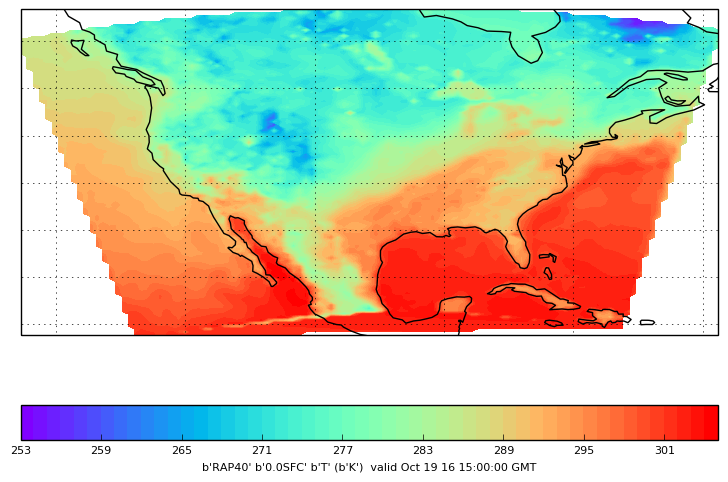

In [ ]:
# Create Map
cmap = plt.get_cmap('rainbow')
matplotlib.rcParams.update({'font.size': 8})
plt.figure(figsize=(9, 6), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())

cs = plt.contourf(rlons, rlats, rdata, 60, cmap=cmap,
                  transform=ccrs.PlateCarree(),
                  vmin=rdata.min(), vmax=rdata.max())

ax.gridlines()
ax.coastlines()
ax.set_aspect('auto', adjustable=None)

cbar = plt.colorbar(orientation='horizontal')
cbar.set_label(str(grid.getLocationName()) +" "+ str(grid.getLevel()) + " "  + str(grid.getParameter()) + " " \
        "(" + str(grid.getUnit()) + ") " + " valid " + str(grid.getDataTime().getRefTime()) )


# Upper Air Soundings (BUFR)

In [ ]:
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from metpy.calc import get_wind_components, lcl, dry_lapse, parcel_profile
from metpy.plots import SkewT, Hodograph
from metpy.units import units, concatenate

plt.rcParams['figure.figsize'] = (12, 14)

request = DataAccessLayer.newDataRequest()
request.setDatatype("bufrua")
request.setParameters("tpMan","tdMan","prMan","htMan","wdMan","wsMan")
# Station ID (name doesn't work yet)
request.setLocationNames("72469")
datatimes = DataAccessLayer.getAvailableTimes(request)

# Get most recent record
response = DataAccessLayer.getGeometryData(request,times=datatimes[-1].validPeriod)

# Initialize data arrays
tpMan,tdMan,prMan,htMan,wdMan,wsMan = [],[],[],[],[],[]

# Build ordered arrays
for ob in response:
    print(float(ob.getString(b"prMan")), float(ob.getString(b"wsMan")))
    tpMan.append(float(ob.getString(b"tpMan")))
    tdMan.append(float(ob.getString(b"tdMan")))
    prMan.append(float(ob.getString(b"prMan")))
    htMan.append(float(ob.getString(b"htMan")))
    wdMan.append(float(ob.getString(b"wdMan")))
    wsMan.append(float(ob.getString(b"wsMan")))

# we can use units.* here...
T = np.array(tpMan)-273.15
Td = np.array(tdMan)-273.15
p = np.array(prMan)/100
height = np.array(htMan)
direc = np.array(wdMan)
spd = np.array(wsMan)
u, v = get_wind_components(spd, np.deg2rad(direc))

p = p * units.mbar
T = T * units.degC
Td = Td * units.degC
spd = spd * units.knot
direc = direc * units.deg

# Create a skewT plot
skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

# Calculate LCL height and plot as black dot
l = lcl(p[0], T[0], Td[0])
lcl_temp = dry_lapse(concatenate((p[0], l)), T[0])[-1].to('degC')
skew.plot(l, lcl_temp, 'ko', markerfacecolor='black')

# Calculate full parcel profile and add to plot as black line
prof = parcel_profile(p, T[0], Td[0]).to('degC')
skew.plot(p, prof, 'k', linewidth=2)

# Example of coloring area between profiles
skew.ax.fill_betweenx(p, T, prof, where=T>=prof, facecolor='blue', alpha=0.4)
skew.ax.fill_betweenx(p, T, prof, where=T<prof, facecolor='red', alpha=0.4)

# An example of a slanted line at constant T -- in this case the 0 isotherm
l = skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Draw hodograph
ax_hod = inset_axes(skew.ax, '40%', '40%', loc=3)
h = Hodograph(ax_hod, component_range=80.)
h.add_grid(increment=20)
h.plot_colormapped(u, v, spd)

# Show the plot
plt.show()

84100.0 2.5
100000.0 -9999998.0
92500.0 -9999998.0
85000.0 -9999998.0
70000.0 7.199999809265137
50000.0 25.200000762939453
40000.0 41.099998474121094
30000.0 46.79999923706055
25000.0 54.0
20000.0 39.099998474121094
15000.0 45.79999923706055
10000.0 29.299999237060547
7000.0 12.800000190734863
5000.0 8.699999809265137
3000.0 3.0
2000.0 8.199999809265137
1000.0 15.399999618530273
700.0 -9999998.0
500.0 -9999.0
300.0 -9999.0
200.0 -9999.0
100.0 -9999.0


# Model Soundings

The EDEX modelsounding plugin creates 64-level vertical profiles from GFS and ETA (NAM) BUFR products distributed on NOAAport.

In [ ]:
request = DataAccessLayer.newDataRequest()
request.setDatatype("modelsounding")
request.addIdentifier("reportType", "GFS")
request.setParameters("pressure","temperature","specHum","uComp","vComp")
request.setLocationNames("OAX")

cycles = DataAccessLayer.getAvailableTimes(request, True)
allTimes = DataAccessLayer.getAvailableTimes(request)

# Build one complete model run
fcstRun = []
for time in allTimes:
    if str(time)[:19] == str(cycles[-1]):
        fcstRun.append(time)

# request a single time
response = DataAccessLayer.getGeometryData(request,times=[fcstRun[0]])

In [ ]:
print("parms    = " + str(response[0].getParameters()))
print("site     = " + str(response[0].getLocationName()))
print("datetime = " + str(response[0].getDataTime()))
print("geom     = " + str(response[0].getGeometry()))

tmp,prs,sh,uc,vc = [],[],[],[],[]
for ob in response:
    tmp.append(float(ob.getString(b"temperature")))
    prs.append(float(ob.getString(b"pressure")))
    sh.append(float(ob.getString(b"specHum")))
    uc.append(float(ob.getString(b"uComp")))
    vc.append(float(ob.getString(b"vComp")))

## Create data arrays and calculate dewpoint from spec. humidity

In [ ]:
import matplotlib.tri as mtri
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from math import exp, log

from metpy.calc import get_wind_components, lcl, dry_lapse, parcel_profile, dewpoint
from metpy.calc import get_wind_speed,get_wind_dir, thermo, vapor_pressure
from metpy.plots import SkewT, Hodograph
from metpy.units import units, concatenate

pres = np.array(prs)
# we can use units.* here...
t = (np.array(tmp)-273.16) * units.degC
p = np.array(pres)/100 * units.mbar
s = np.array(sh)

u,v = np.array(uc)*1.94384,np.array(vc)*1.94384 # m/s to knots
spd = get_wind_speed(u, v) * units.knots
dir = get_wind_dir(u, v) * units.deg


## Dewpoint from Specific Humidity

Because the modelsounding plugin does not return dewpoint values, we must calculate the profile ourselves.  Here are three examples of dewpoint calculated from specific humidity, including a manual calculation following NCEP AWIPS/NSHARP. 

### 1) metpy calculated mixing ratio and vapor pressure

In [ ]:
rmix = (s/(1-s)) *1000 * units('g/kg')
e = vapor_pressure(p, rmix)
td = dewpoint(e)

### 2) metpy calculated assuming spec. humidity = mixing ratio

In [ ]:
td2 = dewpoint(vapor_pressure(p, s))

### 3) NCEP AWIPS soundingrequest plugin
based on GEMPAK/NSHARP, from https://github.com/Unidata/awips2-ncep/blob/unidata_16.2.2/edex/gov.noaa.nws.ncep.edex.plugin.soundingrequest/src/gov/noaa/nws/ncep/edex/plugin/soundingrequest/handler/MergeSounding.java#L1783

In [ ]:
# new arrays
ntmp,nprs,nsh = np.array(tmp)-273.16,np.array(prs),np.array(sh)

# where p=pressure(pa), T=temp(C), T0=reference temp(273.16)
rh = 0.263*nprs*nsh / (np.exp(17.67*ntmp/(ntmp+273.16-29.65)))
vaps =  6.112 * np.exp((17.67 * ntmp) / (ntmp + 243.5))
vapr = rh * vaps / 100
dwpc = np.array(243.5 * (np.log(6.112) - np.log(vapr)) / (np.log(vapr) - np.log(6.112) - 17.67)) * units.degC

In [ ]:
print(min(td), max(td))
print(min(td2), max(td2))
print(min(dwpc), max(dwpc))

## Plot with MetPy

In [ ]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 14)

# Create a skewT plot
skew = SkewT()

# Plot the data
skew.plot(p, t, 'r')
skew.plot(p, td, 'b')
skew.plot(p, td2, 'y')
skew.plot(p, dwpc, 'g')

skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

# Calculate LCL height and plot as black dot
l = lcl(p[0], t[0], td[0])
lcl_temp = dry_lapse(concatenate((p[0], l)), t[0])[-1].to('degC')
skew.plot(l, lcl_temp, 'ko', markerfacecolor='black')

# An example of a slanted line at constant T -- in this case the 0 isotherm
l = skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Draw hodograph
ax_hod = inset_axes(skew.ax, '40%', '40%', loc=3)
h = Hodograph(ax_hod, component_range=80.)
h.add_grid(increment=20)
h.plot_colormapped(u, v, spd)

# Show the plot
plt.show()

# Synop/Marine Obs

In [ ]:
from awips.dataaccess import DataAccessLayer

request = DataAccessLayer.newDataRequest()
request.setDatatype("sfcobs")
request.setLocationNames("72421") # Covington, Kentucky (KCVG)

request.setParameters("stationId","timeObs","elevation","reportType",
                  "wx_present","visibility","seaLevelPress","stationPress",
                  "pressChange3Hour","pressChangeChar","temperature",
                  "dewpoint","seaSurfaceTemp","wetBulb","windDir",
                  "windSpeed","equivWindSpeed10m","windGust","precip1Hour",
                  "precip6Hour","precip24Hour" )

datatimes = DataAccessLayer.getAvailableTimes(request)
time = datatimes[-1].validPeriod

response = DataAccessLayer.getGeometryData(request,times=time)
for ob in response:
    print(ob.getParameters())

# Profiler

In [ ]:
MULTI_DIM_PARAMS = set(['vComponent', 'uComponent', 'peakPower', 
                            'levelMode', 'uvQualityCode', 'consensusNum', 
                            'HorizSpStdDev', 'wComponent', 'height', 
                            'VertSpStdDev'])

request = DataAccessLayer.newDataRequest("profiler")
request.setParameters('numProfLvls', 'elevation', 'windDirSfc', 'validTime', 
                  'windSpeedSfc', 'pressure', 'submode', 'relHumidity', 
                  'profilerId', 'rainRate', 'temperature')
request.getParameters().extend(MULTI_DIM_PARAMS)

datatimes = DataAccessLayer.getAvailableTimes(request)
time = datatimes[-1].validPeriod

response = DataAccessLayer.getGeometryData(request,times=time)
for ob in response:
    print(ob.getParameters())


# ACARS

In [ ]:
request = DataAccessLayer.newDataRequest("acars")
request.setParameters("tailNumber", "receiver", "pressure", "flightPhase", 
                  "rollAngleQuality", "temp", "windDirection", "windSpeed",
                  "humidity", "mixingRatio", "icing")
datatimes = DataAccessLayer.getAvailableTimes(request)
time = datatimes[-1].validPeriod

response = DataAccessLayer.getGeometryData(request,times=time)
for ob in response:
    print(ob.getParameters())

# AIREP

In [ ]:
request = DataAccessLayer.newDataRequest("airep")
request.setParameters("id", "flightLevel", "temp", "windDirection", "windSpeed",
                  "flightWeather", "flightHazard", "flightConditions")

datatimes = DataAccessLayer.getAvailableTimes(request)
time = datatimes[-1].validPeriod

response = DataAccessLayer.getGeometryData(request,times=time)
for ob in response:
    print(ob.getParameters())

# PIREP

In [ ]:
MULTI_DIM_PARAMS = set(["hazardType", 
                        "turbType", "turbBaseHeight", "turbTopHeight",
                        "iceType", "iceBaseHeight", "iceTopHeight",
                        "skyCover1", "skyCover2", "skyBaseHeight", "skyTopHeight"
                        ])
    
request = DataAccessLayer.newDataRequest("pirep")
request.setParameters('id', 'flightLevel', 'temp', 'windDirection', 'windSpeed',
                  'horzVisibility', 'aircraftType', 'weatherGroup')
request.getParameters().extend(MULTI_DIM_PARAMS)

datatimes = DataAccessLayer.getAvailableTimes(request)
time = datatimes[-1].validPeriod

response = DataAccessLayer.getGeometryData(request,times=time)
for ob in response:
    print(ob.getParameters())

# NEXRAD Level 3 Plot with Matplotlib

In [ ]:
%matplotlib inline
from awips import ThriftClient, RadarCommon

from dynamicserialize.dstypes.com.raytheon.uf.common.time import TimeRange
from dynamicserialize.dstypes.com.raytheon.uf.common.dataplugin.radar.request import GetRadarDataRecordRequest

from datetime import datetime
from datetime import timedelta

import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

# use metpy for color table
from metpy.plots import ctables

# Set EDEX server and radar site
edex = "edex-cloud.unidata.ucar.edu"
site = "koax"
DataAccessLayer.changeEDEXHost(edex)
radar_request = DataAccessLayer.newDataRequest()
radar_request.setDatatype("radar")
radar_request.setLocationNames(site)

datatimes = DataAccessLayer.getAvailableTimes(radar_request)

# Get last available time
timerange = datatimes[-1].validPeriod
dateTimeStr = str(datatimes[-1])

# Buffer length in seconds
buffer = 60
dateTime = datetime.strptime(dateTimeStr, "%Y-%m-%d %H:%M:%S")
beginRange = dateTime - timedelta(0, buffer)
endRange = dateTime + timedelta(0, buffer)
timerange = TimeRange(beginRange, endRange)

print("using time",dateTimeStr)
print("buffer by",buffer)
print("using range",timerange)

client = ThriftClient.ThriftClient(edex)
request = GetRadarDataRecordRequest()
request.setRadarId(site)
request.setPrimaryElevationAngle("0.5")
request.setTimeRange(timerange)

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
for v, ctable, ax in zip((94, 99), ('NWSReflectivity', 'NWSVelocity'), axes):
    request.setProductCode(v)
    response = client.sendRequest(request)
    if response.getData():
        for record in response.getData():
            idra = record.getHdf5Data()
            rdat,azdat,depVals,threshVals = RadarCommon.get_hdf5_data(idra)
            dim = rdat.getDimension()
            yLen,xLen = rdat.getSizes()
            array = rdat.getByteData()
            
            # get data for azimuth angles if we have them.
            if azdat :
                azVals = azdat.getFloatData()
                az = np.array(RadarCommon.encode_radial(azVals))
                dattyp = RadarCommon.get_data_type(azdat)
                az = np.append(az,az[-1])
                
            print("found",v,record.getDataTime())

            header = RadarCommon.get_header(record, format, xLen, yLen, azdat, "description")
            rng = np.linspace(0, xLen, xLen + 1)
            xlocs = rng * np.sin(np.deg2rad(az[:, np.newaxis]))
            ylocs = rng * np.cos(np.deg2rad(az[:, np.newaxis]))
            multiArray = np.reshape(array, (-1, xLen))
            data = ma.array(multiArray)
            data[data==0] = ma.masked

            # Plot the data
            norm, cmap = ctables.registry.get_with_steps(ctable, 16, 16)
            ax.pcolormesh(xlocs, ylocs, data, norm=norm, cmap=cmap)
            ax.set_aspect('equal', 'datalim')
            
            multp = 100*(2*xLen/460)
            ax.set_xlim(-multp,multp)
            ax.set_ylim(-multp,multp)
            # This is setting x/ylim on gate/pixel and not km


plt.show()

In [ ]:
from datetime import timedelta

radar_monitor = DataAccessLayer.newDataRequest()
radar_monitor.setDatatype("radar")
stid="kftg"
radar_monitor.setLocationNames(stid)

# available times
datatimes = DataAccessLayer.getAvailableTimes(radar_monitor)
timerange = datatimes[-1].validPeriod
utcnow = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")

# 7 days = 168 hrs = 2520 frames
#    <period>07-00:00:00</period>
#    from common_static/base/purge/radarPurgeRules.xml
#    @https://goo.gl/VkEai9

print(len(datatimes), "frames available")
print("latest =", str(datatimes[-1]))
print("utcnow =", utcnow)

fmt = '%Y-%m-%d %H:%M:%S'
d1 = datetime.strptime(str(datatimes[-1]), fmt)
d2 = datetime.strptime(str(utcnow), fmt)
print("")
print("***", (d2-d1), "since radar ingest for", stid)

# alert after 15 min
if (d2-d1) > timedelta(minutes=15):
    print("*** latency > 15 minutes")
    # do something here

## EDEX Data Monitor

A simple script to monitor the live data ingest of a remote EDEX server.  Check the timestamp of the last available level 3 radar file for KFTG (Denver, CO), which should be ingested every 5 minutes. 